# **US DEBT TO GDP**
---
- Tracking Total Debt of Economy as a Percentage of the Total Income of the Economy (GDP)
- Tracking Total Amount of Debt Service Payments Relative to GDP
- Over 12yr Period


### Import Libraries 

In [3]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

### Import US GDP and Debt from [Federal Reserve Economic Data Repository (FRED)](https://fred.stlouisfed.org/)

In [4]:
files = os.listdir('data/FRED')
measurements = {}
for file in files: 
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        measurements[name] = pd.read_csv('data/FRED/'+file, index_col='DATE')
        measurements[name].index = pd.to_datetime(measurements[name].index)
print('List of Measurements: ', end=' ')
for i in measurements.keys(): 
    print(i.upper(), end=' ')
print('\n')
print(pd.read_csv('data/references/FREDdata_refs.csv'))

List of Measurements:  ASTLL ASTDSL ASCMA ASFMA NCBDBIQ027S GFDEBTN MTSO133FMS NCBLL FGDSLAQ027S REVOLSL ASMRMA SLGSDODNS ASHMA MVLOAS SLOAS FBLL NNBLL GDP TOTALSL FBDSILQ027S 

      Series_ID                                            URLS
0         ASCMA        https://fred.stlouisfed.org/series/ASCMA
1         ASFMA        https://fred.stlouisfed.org/series/ASFMA
2         ASHMA        https://fred.stlouisfed.org/series/ASHMA
3        ASMRMA       https://fred.stlouisfed.org/series/ASMRMA
4        ASTDSL       https://fred.stlouisfed.org/series/ASTDSL
5         ASTLL        https://fred.stlouisfed.org/series/ASTLL
6   FBDSILQ027S  https://fred.stlouisfed.org/series/FBDSILQ027S
7          FBLL         https://fred.stlouisfed.org/series/FBLL
8   FGDSLAQ027S  https://fred.stlouisfed.org/series/FGDSLAQ027S
9           GDP          https://fred.stlouisfed.org/series/GDP
10      GFDEBTN      https://fred.stlouisfed.org/series/GFDEBTN
11       MVLOAS       https://fred.stlouisfed.org/seri

In [ ]:
def _1960_Present(file_addy): 
    new_df = file_addy['1960-01-01':'2021-10-01']
    new_df = new_df.astype(float, errors='raise')
    #new_df.info()
    return new_df

### Find Total Debt 

## By Category 

In [16]:
import debtToGDP as dtg # made into class now-> calling functions gunna be whacky 

# desired date range 
start = '1960-01-01'
end = '2021-10-01'


debtion = dtg.DEBT(dtg.measurements,start,end)

In [17]:
debtion.total_household_nonprofit_debt()

,ASHMA,ASMRMA,MVLOAS,SLOAS,REVOLSL,debt_sum
DATE,,,,,,
1960-01-01,132580.0,19199.0,16910.00,0.00,0.00,168689.00
1960-04-01,135366.0,19702.0,17847.00,0.00,0.00,172915.00
1960-07-01,138582.0,20293.0,18173.00,0.00,0.00,177048.00
1960-10-01,141378.0,20786.0,18083.00,0.00,0.00,180247.00
1961-01-01,143645.0,21424.0,17516.00,0.00,0.00,182585.00
...,...,...,...,...,...,...
2020-10-01,11652712.0,1754956.0,1224446.74,1702599.57,977822.32,17312536.63
2021-01-01,11783978.0,1784557.0,1240753.93,1728113.34,963269.55,17500671.82
2021-04-01,12022165.0,1810298.0,1275241.27,1730258.67,965332.85,17803295.79


In [18]:
# Business

def total_business_debt(start,end): 
    tot_commercial_mort = dtg.date_range(dtg.measurements['ASCMA'],start,end)
    tot_farm_mort = dtg.date_range(dtg.measurements['ASFMA'],start,end)
    tot_fin_biz_debt_secur = dtg.date_range(dtg.measurements['FBDSILQ027S'],start,end)
    tot_fin_biz_loans_liab = dtg.date_range(dtg.measurements['FBLL'],start,end)
    tot_nf_corp_debt_secur = dtg.date_range(dtg.measurements['NCBDBIQ027S'],start,end)
    tot_nf_corp_loans = dtg.date_range(dtg.measurements['NCBLL'],start,end)
    tot_nf_ncorp_biz_loans = dtg.date_range(dtg.measurements['NNBLL'],start,end)
    
    tot_biz_debt = pd.concat([tot_commercial_mort, tot_farm_mort, tot_fin_biz_debt_secur,
                             tot_fin_biz_loans_liab, tot_nf_corp_debt_secur, tot_nf_corp_loans,
                             tot_nf_ncorp_biz_loans],
                             axis=1, join='outer')
    return tot_biz_debt


In [19]:
biz_debt = total_business_debt(start,end)
#biz_debt.info()
#biz_debt.isnull().sum()
biz_debt

,ASCMA,ASFMA,FBDSILQ027S,FBLL,NCBDBIQ027S,NCBLL,NNBLL
DATE,,,,,,,
1960-01-01,30899.0,12271.0,20420.0,12615.0,73643.0,65097.0,51424.0
1960-04-01,31668.0,12559.0,21728.0,13026.0,74654.0,66747.0,53204.0
1960-07-01,32531.0,12697.0,22613.0,13190.0,75671.0,66250.0,54374.0
1960-10-01,33407.0,12838.0,23616.0,14093.0,76985.0,68607.0,55024.0
1961-01-01,34121.0,13063.0,24517.0,11269.0,77200.0,68327.0,56905.0
...,...,...,...,...,...,...,...
2020-10-01,3080710.0,288600.0,14873710.0,2122510.0,7213373.0,3861573.0,6653346.0
2021-01-01,3100134.0,291830.0,15052158.0,2167448.0,7339193.0,3940240.0,6714335.0
2021-04-01,3141538.0,295096.0,15350444.0,2217861.0,7350011.0,3923291.0,6752664.0


In [20]:
# Government: 

def total_gov_debt(start,end): 
    fed_securities = dtg.date_range(measurements['FGDSLAQ027S'],start,end) #millions Quarterly
    state_local = dtg.date_range(measurements['SLGSDODNS'],start,end)*1000 #billions Quarterly
    #fed_non_securities = dtg.date_range(measurements['GFDEBTN-NONSEC'])
    
    tot_gov_debt = pd.concat([fed_securities, state_local],
                            axis=1, join='outer')
    
    tot_gov_debt = tot_gov_debt.fillna(0)
    #tot_gov_debt = tot_gov_debt[tot_gov_debt[] != 0] #no non-quarterly data
    tot_gov_debt['debt_sum'] = tot_gov_debt.sum(axis=1)
    return tot_gov_debt

In [21]:
gov_debt = total_gov_debt(start,end)
gov_debt.tail(20)

,FGDSLAQ027S,SLGSDODNS,debt_sum
DATE,,,
2017-01-01,15897987.0,3142272.0,19040259.0
2017-04-01,15822700.0,3138536.0,18961236.0
2017-07-01,16255106.0,3134717.0,19389823.0
2017-10-01,16455261.0,3158998.0,19614259.0
2018-01-01,17070617.0,3137556.0,20208173.0
2018-04-01,17114196.0,3138628.0,20252824.0
2018-07-01,17440621.0,3140654.0,20581275.0
2018-10-01,17865026.0,3120282.0,20985308.0
2019-01-01,17928466.0,3102889.0,21031355.0


In [22]:
# Household + Non-Profit 
def total_household_nonprofit_debt(start,end): 
    onefour_mort = dtg.date_range(dtg.measurements['ASHMA'],start,end) #millions Quarterly
    multi_mort = dtg.date_range(dtg.measurements['ASMRMA'],start,end) #millions Quarterly
    auto_loan = dtg.date_range(dtg.measurements['MVLOAS'],start,end)*1000 #billions Quarterly
    stu_loan = dtg.date_range(dtg.measurements['SLOAS'],start,end)*1000 #billions Quarterly
    credit_card = dtg.date_range(dtg.measurements['REVOLSL'],start,end)*1000 #billions MONTHLY
    
    tot_house_debt = pd.concat([onefour_mort, multi_mort, auto_loan, stu_loan, credit_card], 
                               axis=1, join='outer')
    
    tot_house_debt = tot_house_debt.fillna(0)
    tot_house_debt = tot_house_debt[tot_house_debt['ASHMA'] != 0]
    tot_house_debt['debt_sum'] = tot_house_debt.sum(axis=1)

    return tot_house_debt


In [24]:
house_debt = total_household_nonprofit_debt(start,end)
house_debt.tail(20)

,ASHMA,ASMRMA,MVLOAS,SLOAS,REVOLSL,debt_sum
DATE,,,,,,
2017-01-01,10338308.0,1262250.0,1068025.41,1440358.58,962277.91,15071219.90
2017-04-01,10417101.0,1287971.0,1081511.84,1446680.08,973476.27,15206740.19
2017-07-01,10510631.0,1314698.0,1093958.97,1479029.56,985190.87,15383508.40
2017-10-01,10595926.0,1363183.0,1101991.85,1488895.49,1004038.07,15554034.41
2018-01-01,10639958.0,1387382.0,1105018.26,1523343.76,1021295.39,15676997.41
2018-04-01,10728413.0,1417044.0,1115601.48,1530756.57,1018559.14,15810374.19
2018-07-01,10831242.0,1453905.0,1131409.26,1560681.66,1034814.77,16012052.69
2018-10-01,10897248.0,1488401.0,1139608.37,1570539.65,1049365.07,16145162.09
2019-01-01,10926944.0,1512591.0,1144170.73,1602053.96,1057812.63,16243572.32


No handles with labels found to put in legend.


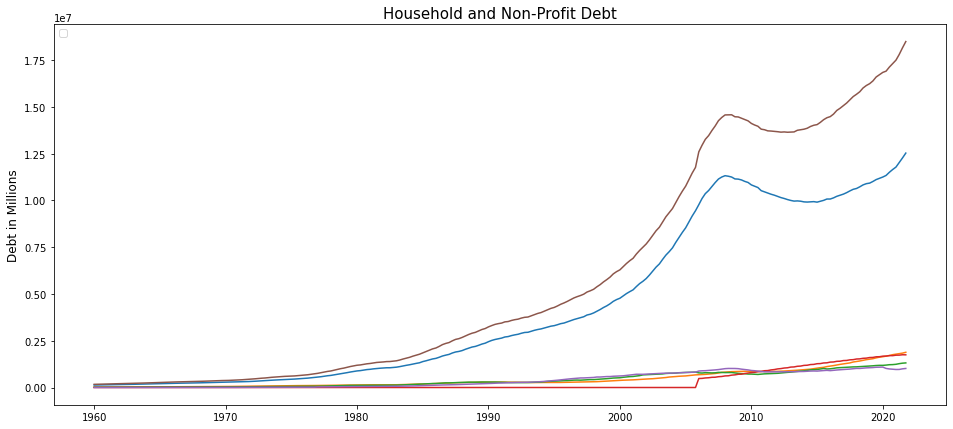

In [25]:
plt.figure(figsize=(16,7))

plt.plot(house_debt)

plt.title('Household and Non-Profit Debt', fontsize=15)
#plt.yticks(np.linspace(0,2000000,10000, dtype=int))
plt.ylabel('Debt in Millions', fontsize=12)
plt.legend(loc=2)
plt.show()